In [143]:
#Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Clean data into usable data frame and add column for National Park (@<twitterhandle>)
file = "Twitter_Output/tweets.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Tweets,id,len,date,source,likes,retweets
0,0,RT @NWSFlagstaff: One more day of warm to hot ...,1275606903557513216,140,2020-06-24 01:49:20,Twitter for iPhone,0,4
1,1,"#MangumFire Update for Tuesday, June 23, 2020\...",1275503892697137152,140,2020-06-23 19:00:00,Twitter Web App,10,3
2,2,It's hot—but do you know how hot?\n\nWhat many...,1275473698699399168,139,2020-06-23 17:00:01,Twitter Media Studio,307,112
3,3,When you see a fawn on the side of the road or...,1275420846798942209,140,2020-06-23 13:30:00,Twitter Media Studio,159,27
4,4,Grand Canyon National Park News Release: June ...,1275202801451192320,140,2020-06-22 23:03:34,Twitter Web App,205,48


In [39]:
df.count()

Unnamed: 0    1800
Tweets        1800
id            1800
len           1800
date          1800
source        1800
likes         1800
retweets      1800
dtype: int64

In [40]:
smoke_start = df.loc[200:]
smoke_start

,Unnamed: 0,Tweets,id,len,date,source,likes,retweets
200,0,"Welcome summer! Long days, heavy storms, and p...",1275428506474893315,140,2020-06-23 14:00:26,Twitter Web App,406,85
201,1,"Birds, bees, butterflies, bats, beetles… Bears...",1275053004249600000,140,2020-06-22 13:08:20,Twitter for Android,300,39
202,2,Happy Fathers Day! Did you know that foxes are...,1274706059584733190,140,2020-06-21 14:09:42,Twitter Web App,1421,216
203,3,"To prevent their spread, use dead and downed w...",1274346704402370560,140,2020-06-20 14:21:45,Twitter Web App,28,3
204,4,Insects play a vital role in the health of our...,1274346702233899008,140,2020-06-20 14:21:44,Twitter Web App,67,14
...,...,...,...,...,...,...,...,...
1795,195,@10Best We saw these two white-tailed deer thi...,884491852325507072,140,2017-07-10 19:17:45,Twitter Web Client,8,0
1796,196,@10Best Acadia offers incredible views of moun...,884491133598019584,105,2017-07-10 19:14:53,Twitter Web Client,2,1
1797,197,RT @10Best: Welcome to the #10BestTravel Chat ...,884488999015940096,132,2017-07-10 19:06:25,Twitter Web Client,0,15
1798,198,@10Best @NatlParkService Acadia National Park ...,884488901339041792,80,2017-07-10 19:06:01,Twitter Web Client,4,0


In [66]:
df_no_unnamed = df.drop(columns=['Unnamed: 0'])
df_no_unnamed.head(10)

#Add in twitter handles as a column
df_no_unnamed['Twitter Handle'] = ""
df_no_unnamed.loc[0:199, "Twitter Handle"] = "@GrandCanyonNPS"
df_no_unnamed.loc[200:399, "Twitter Handle"] = "@GreatSmokyNPS"
df_no_unnamed.loc[400:599, "Twitter Handle"] = "@YosemiteNPS"
df_no_unnamed.loc[600:799, "Twitter Handle"] = "@RockyNPS"
df_no_unnamed.loc[800:999, "Twitter Handle"] = "@YellowstoneNPS"
df_no_unnamed.loc[1000:1199, "Twitter Handle"] = "@ZionNPS"
df_no_unnamed.loc[1200:1399, "Twitter Handle"] = "@OlympicNP"
df_no_unnamed.loc[1400:1599, "Twitter Handle"] = "@GrandTetonNPS"
df_no_unnamed.loc[1600:1799, "Twitter Handle"] = "@AcadiaNPS"
df_no_unnamed.nunique()

Tweets            1792
id                1800
len                127
date              1773
source              11
likes              383
retweets           214
Twitter Handle       9
dtype: int64

In [190]:
#break df_no_unnamed into smaller data frames based on site
df_smoky = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@GreatSmokyNPS']
df_canyon = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@GrandCanyonNPS']
df_yosemite = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@YosemiteNPS']
df_rocky = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@RockyNPS']
df_yellow = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@YellowstoneNPS']
df_zion = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@ZionNPS']
df_olympic = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@OlympicNP']
df_teton = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@GrandTetonNPS']
df_acadia = df_no_unnamed.loc[df_no_unnamed['Twitter Handle']=='@AcadiaNPS']

df_acadia

,Tweets,id,len,date,source,likes,retweets,Twitter Handle
1600,Wildlife sighting this morning along a road cr...,1274311476602376192,134,2020-06-20 12:01:46,Twitter for Android,50,3,@AcadiaNPS
1601,Acadia's branch of America's National Parks® S...,1274028994774646785,140,2020-06-19 17:19:17,Twitter Web App,17,3,@AcadiaNPS
1602,RT @SecBernhardt: Recognized as America’s best...,1270420618798915586,140,2020-06-09 18:20:53,Twitter for Android,0,733,@AcadiaNPS
1603,Acadia's carriage roads are now open to pedest...,1269607386962178048,140,2020-06-07 12:29:23,Twitter for Android,34,9,@AcadiaNPS
1604,"With the reopening of the Park Loop Road, all ...",1267484534376980482,140,2020-06-01 15:53:56,Twitter Web App,19,5,@AcadiaNPS
...,...,...,...,...,...,...,...,...
1795,@10Best We saw these two white-tailed deer thi...,884491852325507072,140,2017-07-10 19:17:45,Twitter Web Client,8,0,@AcadiaNPS
1796,@10Best Acadia offers incredible views of moun...,884491133598019584,105,2017-07-10 19:14:53,Twitter Web Client,2,1,@AcadiaNPS
1797,RT @10Best: Welcome to the #10BestTravel Chat ...,884488999015940096,132,2017-07-10 19:06:25,Twitter Web Client,0,15,@AcadiaNPS
1798,@10Best @NatlParkService Acadia National Park ...,884488901339041792,80,2017-07-10 19:06:01,Twitter Web Client,4,0,@AcadiaNPS


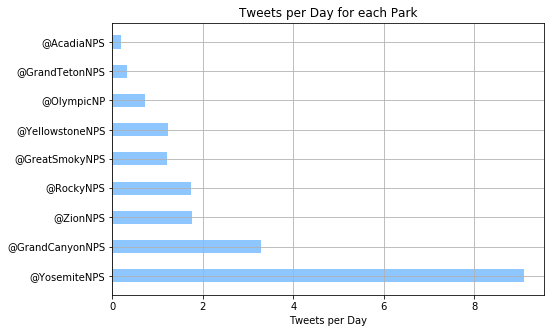

In [200]:
smoky_days = 166
canyon_days = 61
yosemite_days = 22
rocky_days = 115
yellow_days = 163
zion_days = 114
olympic_days = 274
teton_days = 612
acadia_days = 1081

smoky_per_day = 200/smoky_days
canyon_per_day = 200/canyon_days
yosemite_per_day = 200/yosemite_days
rocky_per_day = 200/rocky_days
yellow_per_day = 200/yellow_days
zion_per_day = 200/zion_days
olympic_per_day = 200/olympic_days
teton_per_day = 200/teton_days
acadia_per_day = 200/acadia_days

per_day_list = [yosemite_per_day, canyon_per_day, zion_per_day,rocky_per_day, smoky_per_day, yellow_per_day,  olympic_per_day, teton_per_day, acadia_per_day]
handles = ['@YosemiteNPS','@GrandCanyonNPS','@ZionNPS','@RockyNPS','@GreatSmokyNPS', '@YellowstoneNPS', '@OlympicNP', '@GrandTetonNPS', '@AcadiaNPS']
width = .45
#Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Create a bar with total likes
plt.barh(handles, per_day_list, width, alpha=0.5, color='#1E90FF', label=handles)
plt.grid()
plt.gcf().subplots_adjust(left=0.30)
ax.set_xlabel('Tweets per Day')
ax.set_title('Tweets per Day for each Park')

plt.savefig("Twitter_Output/Tweetsperday.png")
plt.show()

In [177]:
#build summary table combining each site agg stats: total likes, total retweets, mean likes, mean retweets, mean len

df_list = [df_canyon, df_yosemite, df_rocky, df_yellow, df_zion, df_olympic, df_teton, df_acadia]
def build_summary_table(df):
    likes = df['likes'].sum()
    meanlikes = df['likes'].mean()
    medianlikes = df['likes'].median()
    retweets = df['retweets'].sum()
    meanretweets = df['retweets'].mean()
    medianretweets = df['retweets'].median()
    meanlen = df['len'].mean()
    name = df["Twitter Handle"].unique()
    
    summary_row = pd.DataFrame(
        [[name[0], likes, meanlikes, medianlikes, retweets, meanretweets, medianretweets, meanlen]],
        columns=['Twitter Handle', 'Total Likes', 'Average Likes', "Median Likes", 'Total Retweets', "Average Retweets", "Median Retweets", 'Average Length']
    )
    return summary_row

summary_table = build_summary_table(df_smoky)
for df in df_list:
    summary = build_summary_table(df)
    all_summary = pd.concat([summary_table, summary])
    summary_table = all_summary
final = all_summary.reset_index()    
final

,index,Twitter Handle,Total Likes,Average Likes,Median Likes,Total Retweets,Average Retweets,Median Retweets,Average Length
0,0,@GreatSmokyNPS,38302,191.510,113.5,6038,30.190,13.0,135.980
1,0,@GrandCanyonNPS,40378,201.890,30.0,10188,50.940,13.5,128.905
2,0,@YosemiteNPS,14759,73.795,0.5,2727,13.635,0.0,93.940
3,0,@RockyNPS,4969,24.845,0.0,13226,66.130,6.5,129.995
4,0,@YellowstoneNPS,103276,516.380,157.0,19034,95.170,34.5,122.040
5,0,@ZionNPS,4422,22.110,9.5,927,4.635,1.0,119.615
6,0,@OlympicNP,4242,21.210,4.0,16198,80.990,5.0,124.535
7,0,@GrandTetonNPS,10255,51.275,24.0,3269,16.345,4.5,137.490
8,0,@AcadiaNPS,4834,24.170,14.0,3329,16.645,4.0,133.520


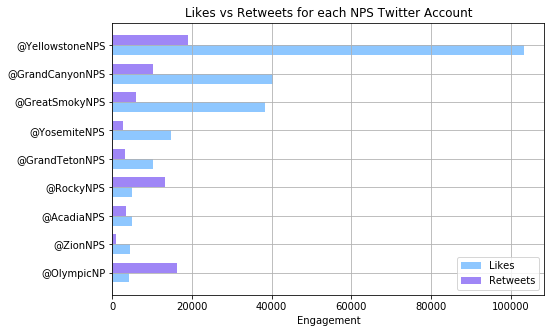

In [201]:
fina = final.sort_values('Total Likes')
#Plot total likes and total retweets
pos = list(range(len(fina['Total Likes'])))
width = 0.35

#Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Create a bar with total likes
plt.barh(pos, fina['Total Likes'], width, alpha=0.5, color='#1E90FF', label=fina['Twitter Handle'][0])
plt.barh([p + width for p in pos], fina['Total Retweets'], width, alpha=0.5, color='#410EEE', label=fina['Twitter Handle'][1])
plt.grid()
ax.set_xlabel('Engagement')
ax.set_title('Likes vs Retweets for each NPS Twitter Account')
ax.set_yticks([p + .5 * width for p in pos])
ax.set_yticklabels(fina['Twitter Handle'])
plt.gcf().subplots_adjust(left=0.30)

plt.legend(['Likes', 'Retweets'], loc='lower right')
plt.savefig("Twitter_Output/LikesvsRetweets.png")
plt.show()

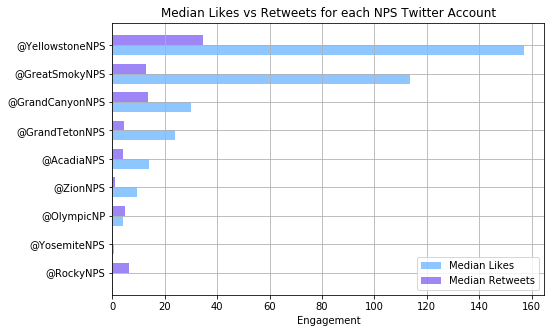

In [202]:
finam = final.sort_values('Median Likes')
#Plot total likes and total retweets
pos = list(range(len(finam['Median Likes'])))
width = 0.35

#Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Create a bar with total likes
plt.barh(pos, finam['Median Likes'], width, alpha=0.5, color='#1E90FF', label=fina['Twitter Handle'][0])
plt.barh([p + width for p in pos], finam['Median Retweets'], width, alpha=0.5, color='#410EEE', label=fina['Twitter Handle'][1])
plt.grid()
ax.set_xlabel('Engagement')
ax.set_title('Median Likes vs Retweets for each NPS Twitter Account')
ax.set_yticks([p + .5 * width for p in pos])
ax.set_yticklabels(finam['Twitter Handle'])
plt.gcf().subplots_adjust(left=0.30)



plt.legend(['Median Likes', 'Median Retweets'], loc='lower right')
plt.savefig("Twitter_Output/MedianLikesvsRetweets.png")
plt.show()

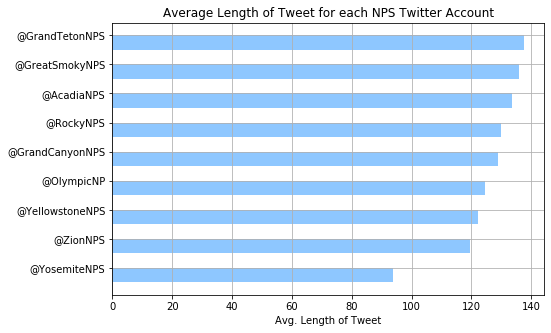

In [203]:
inal = final.sort_values('Average Length')
#Plot avg likes and avg retweets
pos = list(range(len(inal['Average Length'])))
width = 0.50

#Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Create a bar with total likes
plt.barh(pos, inal['Average Length'], width, alpha=0.5, color='#1E90FF', label=inal['Twitter Handle'][0])
plt.grid()
ax.set_xlabel('Avg. Length of Tweet')
ax.set_title('Average Length of Tweet for each NPS Twitter Account')
ax.set_yticks([p + .5 * width for p in pos])
ax.set_yticklabels(inal['Twitter Handle'])
plt.gcf().subplots_adjust(left=0.30)
plt.savefig("Twitter_Output/AvgTweetLength.png")
plt.show()